# Heater Characterisation

In [1]:
#run this cell if you want to be able to autoreload packages
#(meaning that you don't have to restart the kernal when you make changes to code)

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import time
import ZeroLevel_Qontrol as q0
import FirstLevel_Qontrol as q1
import SecondLevel_Qontrol as q2
from powermeter import Powermeter as PM
import heater_dict as hd
import heater_characterisation_funcs as hcf
from tunicsqontrol import tunics
import LivePlotting as LP
%matplotlib inline
import collections
import Chip_configurations as CF

pi=np.pi


## Initialise

In [3]:
# powermeter1 = Powermeter('PM100USB', serial='P2003916', unit='dBm', wavelength=1550) 
unit='dBm'
wavelength=1550
#Alice (tele) powermeters 10/03/20:
PMa = PM('PM100USB', serial='P2007347',unit=unit, wavelength = wavelength)
PMb = PM('PM100USB', serial='P2010371',unit=unit, wavelength = wavelength) 
PMc = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength)
PMd = PM('PM100USB', serial='P2008115',unit=unit, wavelength = wavelength)
#Charlie powermeters 10/03/20:
PMe = PM('PM100USB', serial='P2005653',unit=unit, wavelength = wavelength)
PMf = PM('PM100USB', serial='P2010372',unit=unit, wavelength = wavelength) 
PMg = PM('PM100USB', serial='P2008116',unit=unit, wavelength = wavelength)
PMh = PM('PM100USB', serial='P2007346',unit=unit, wavelength = wavelength)

In [4]:
serial_port_name = 'COM13'
mytunics = tunics(serial_port_name = serial_port_name)


Connected to Tunics laser on serial port COM13



In [5]:
"""serial_port_name_qontrol = 'COM3'
q = q0.QXOutput(serial_port_name=serial_port_name_qontrol, response_timeout=0.1)
heaters = q1.HeaterQontrol(q, uep.heater_dict, default_max_v=7)"""
h=q2.heater_class(hd.board_list,hd.heaters)

In [6]:
p_wavelength = 1549.3
i_wavelength = 1558.98
s_wavelength = 1539.77

In [7]:
mytunics.laser_switch('off')
h.set_all_zeros_bad()

In [9]:
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on') 
mytunics.laser_power(3) 

In [9]:
PM_idler = {"PMa":PMa,"PMb":PMb, "PMc":PMc,"PMd":PMd}
PM_signal = {"PMe":PMe,"PMf":PMf, "PMg":PMg,"PMh":PMh}

In [10]:
h.set_phase("Ctr_2",0)
h.set_phase("BS1",0)
h.set_phase("BS3",0)
h.set_phase("Prj_RY4",pi)

In [17]:
PMa.measure()

-18.554487343299353

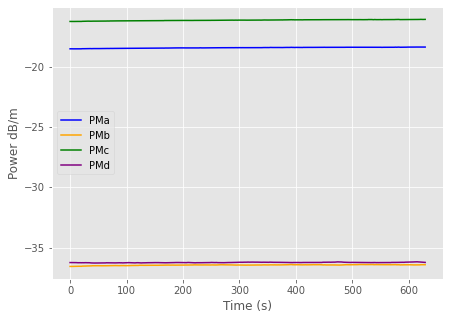

In [18]:
LP.live_opt_pow(heaters = PM_idler)

## Calibration (Alice)

### Prj_RY1 -> input 22 output 6 (Happy) - Ben 30072020

0.179357953369563 1.9369247206397406 3.665520359906924e-06 -7.339044877210788e-09
fit visibility = -499.45468671122353
data visibility = 1.0


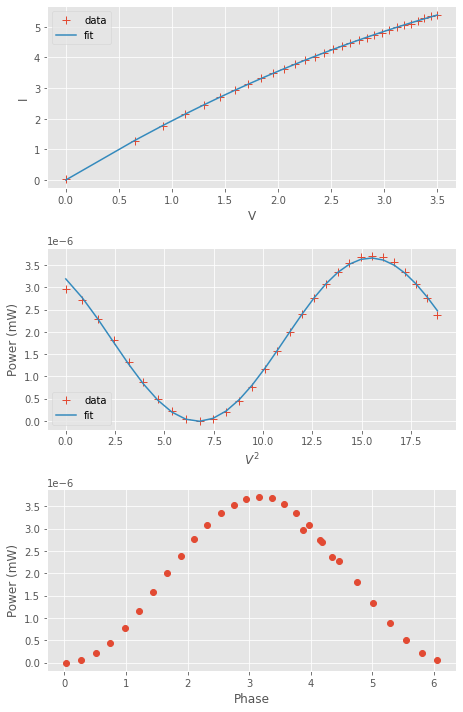

In [25]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,2,1e-3,1e-3]
phase_offset = 0
phases_to_set={'Atta1':pi, 'MZIa1':pi, 'MZIa3':pi}
#phases_to_set = {'BS1':pi, 'BS2':pi, 'WDM1':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Prj_RY1",phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.16755775954441887 2.6771907608720857 -4.668152594464794e-08 5.943967582678508e-08
fit visibility = -0.7853596994822778
data visibility = 0.6774067702251074


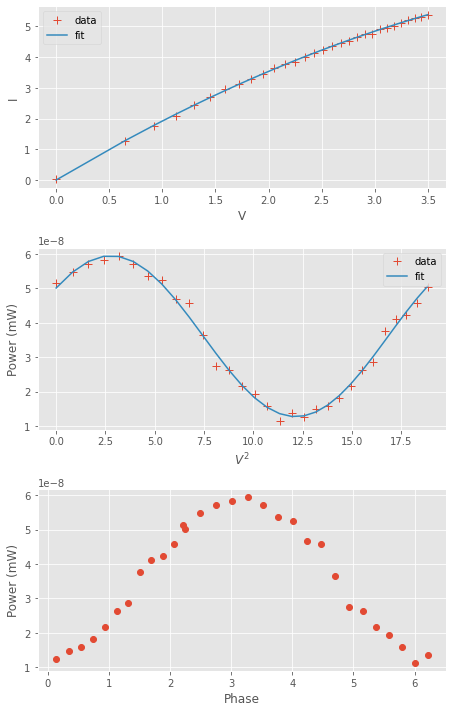

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,2,1e-3,1e-3]
phase_offset = pi
phases_to_set={'Atta1':pi, 'Atta2':0, 'MZIa1':pi, 'MZIa3':pi, 'BS1':0, 'BS2':0, 'WDM1':pi/2}
#phases_to_set = {'BS1':pi, 'BS2':pi, 'WDM1':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Prj_RY1",phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### WDM1 -> input 23 output 6 (Happy) - Ben 30072020

0.19663279494961916 0.9556769131154151 0.0010704271707031874 5.712680860219858e-06
fit visibility = 187.37737970925104
data visibility = 0.9970824286079809


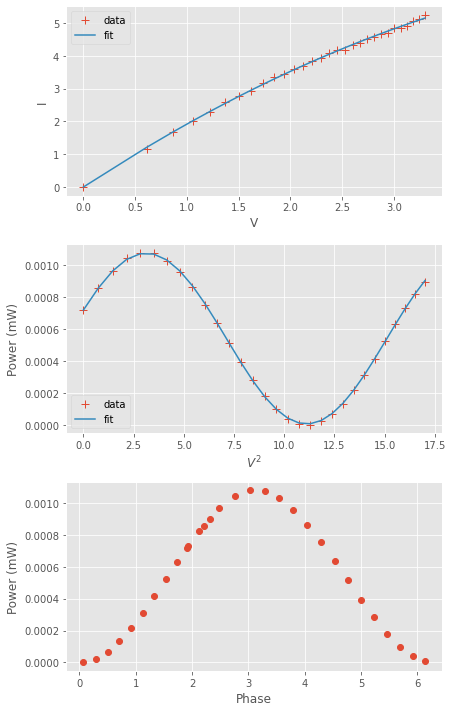

In [19]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(i_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,2,1e-3,1e-3]
phase_offset = 0
# phases_to_set={'Prj_RY1':pi}
phases_to_set = {'Prj_RY1':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "WDM1",phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### BS2 -> input 3 output 6 (Happy) - Ben 30072020

0.1988861115719994 6.845639903882698 3.5301515583710906e-06 1.8753427958811514e-07
fit visibility = 18.82403348403516
data visibility = 0.9841716945120786


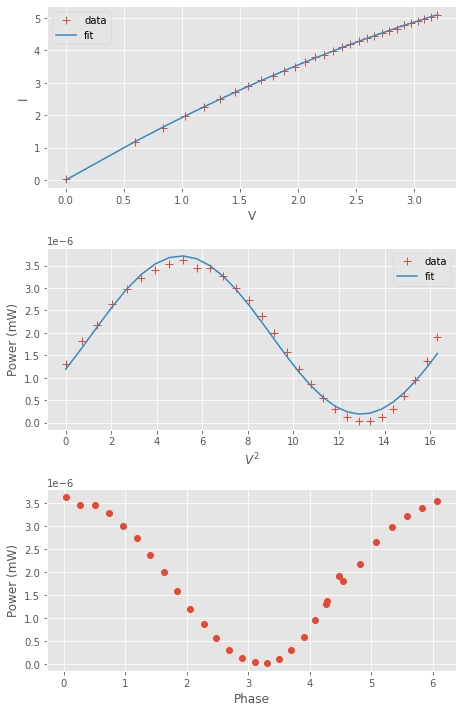

In [21]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={'WDM1':pi/2, "Prj_RY1":pi}#'WDM1':3*pi/2 for pump from top

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "BS2" ,phases_to_set, v_max=3.2, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.165095953959506 2.344223854114207 6.359145810248355e-06 3.2863645780597154e-06
fit visibility = 1.9350092356468933
data visibility = 0.48988066631255406


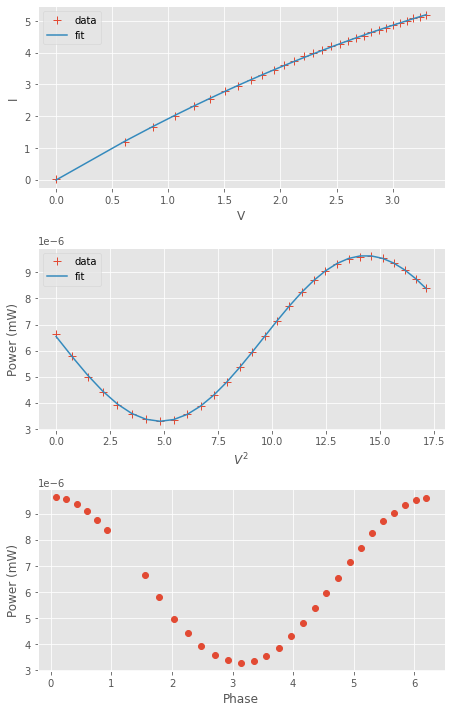

In [10]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,2,1e-3,1e-3]
phase_offset = pi
# phases_to_set={'Prj_RY1':pi}
phases_to_set = {'BS1':0, 'WDM1':pi/2, 'WDM1':pi/2, 'Atta1':pi, 'Atta2':0, 'Atta3':0, 'Atta4':0,'MZIa1':pi, 'MZIa3':pi, 'Prj_RY1': pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "BS2",phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### BS1 -> input 23 output 6 (Happy) - Ben 30072020

0.17543151845601695 2.9020237414485455 0.00023488076804505318 -3.139977727116872e-06
fit visibility = -74.80332297156792
data visibility = 0.99971848443674


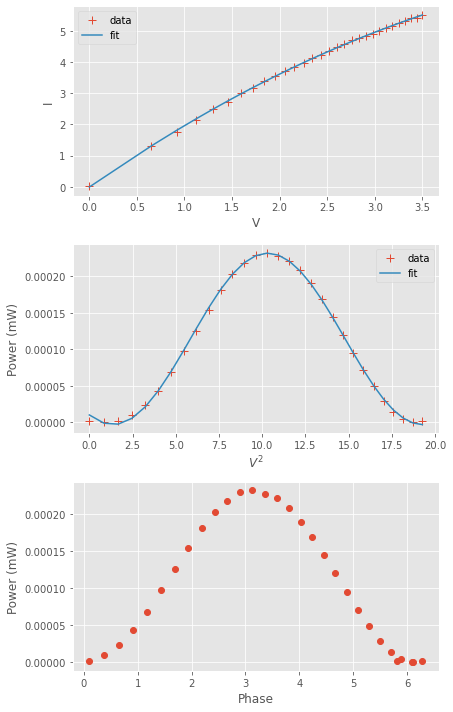

In [22]:
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={}
phases_to_set = {'BS2':0, 'WDM1':pi/2, "Prj_RY1":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "BS1",phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.17167273215964526 1.4543484853982678 6.615752654073974e-06 3.642282048290807e-08
fit visibility = 181.6375713456488
data visibility = 0.9993551853714214


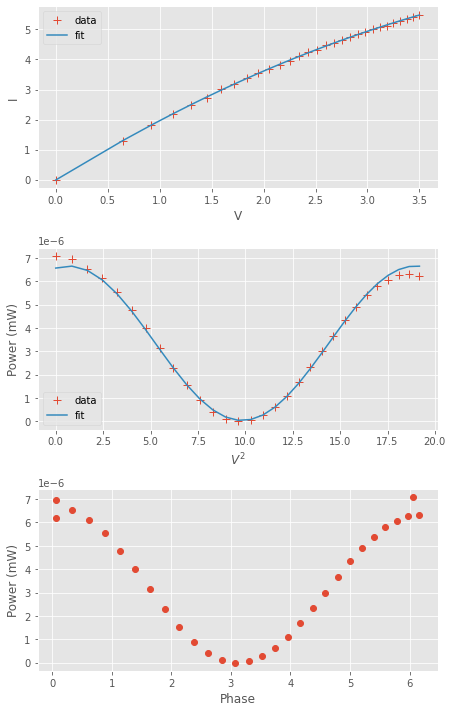

In [13]:
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={}
phases_to_set = {'BS2':0, 'Atta1':pi, 'MZIa1':pi, 'MZIa3':pi, 'Prj_RY1': pi, 'Atta2':0, 'Atta3':0, 'Atta4':0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "BS1",phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### WDM2 -> input 23 output 7 (Happy) - Ben 30072020

0.19111025213548666 2.6951560723178654 0.07223803582788367 -0.00018227140424989196
fit visibility = -396.3212777405619
data visibility = 0.9997263621833177


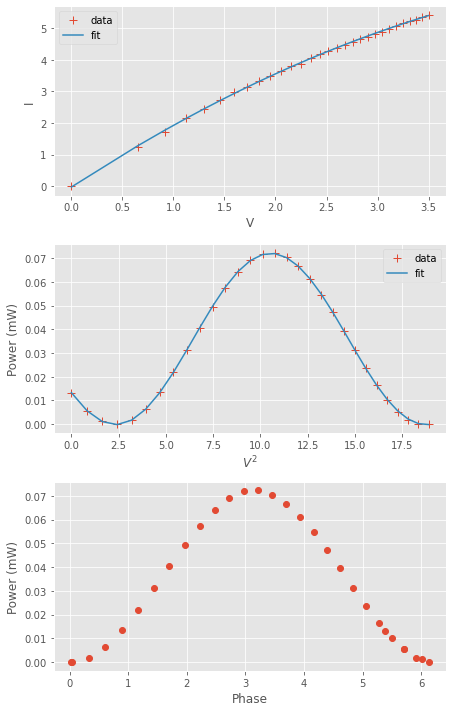

In [23]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(i_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,2,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':pi, 'Prj_RY1':0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "WDM2", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Prj_RY2 -> input 23 output 8 (Happy) - Ben 30072020

0.1840601422111989 1.9690012760098368 0.03145897740922211 0.00022287833056692998
fit visibility = 141.14865868386892
data visibility = 0.980887951777714


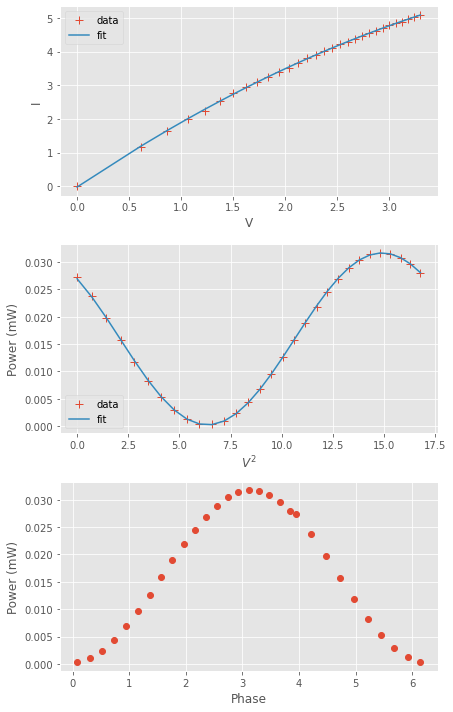

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':pi/2, 'Pre_RY1':pi, 'Bell1':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Prj_RY2", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.1872113834861049 2.778062242526026 2.0242412940286725e-05 2.9258359857064475e-06
fit visibility = 6.9185056986026385
data visibility = 0.8003161120374966


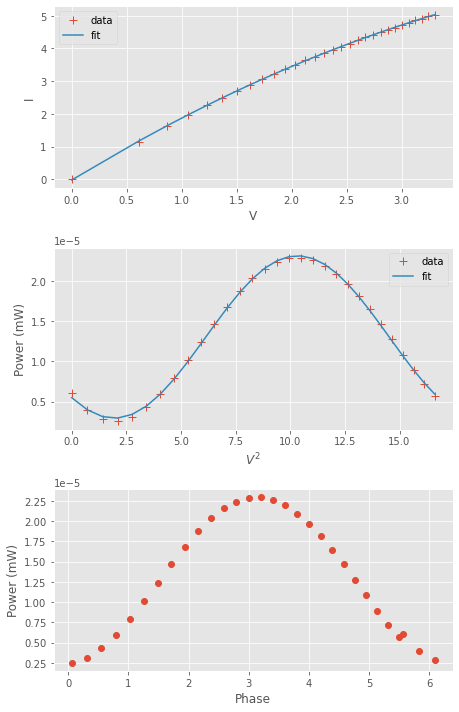

In [7]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set = {"BS1":0, #0.3
    "BS2":pi, #-0.23
    "BS3":0, #0.75
    "WDM1":0,
    "WDM2":0,
    "WDM3":0,
    "WDM4":0,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":0, #trust
    "Prj_RY1":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":0,
    "Ctr_2":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Prj_RY2", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Bell1 -> input 23 output 9 (Happy) - Ben 30072020

0.18477900428982083 2.117177750134904 0.02384667357217969 0.002672004011091817
fit visibility = 8.924639885714699
data visibility = 0.806221443470289


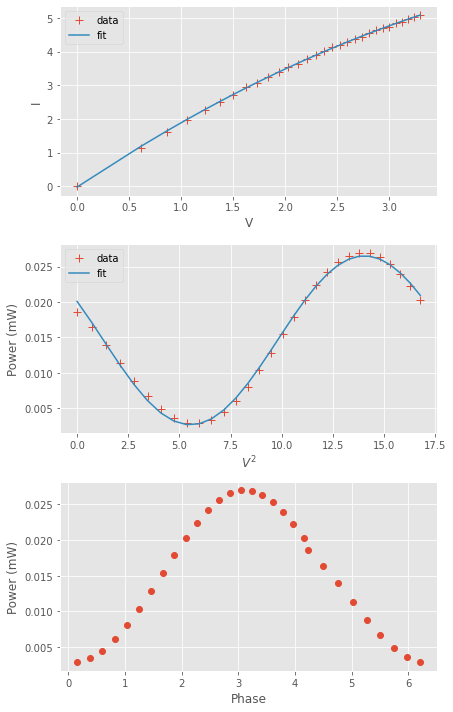

In [12]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':pi/2, 'Pre_RY1':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Bell1", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.18581908972960304 2.2063973522085307 2.862448098546421e-05 -2.047205718700161e-07
fit visibility = -139.82220117887735
data visibility = 0.9928553479833868


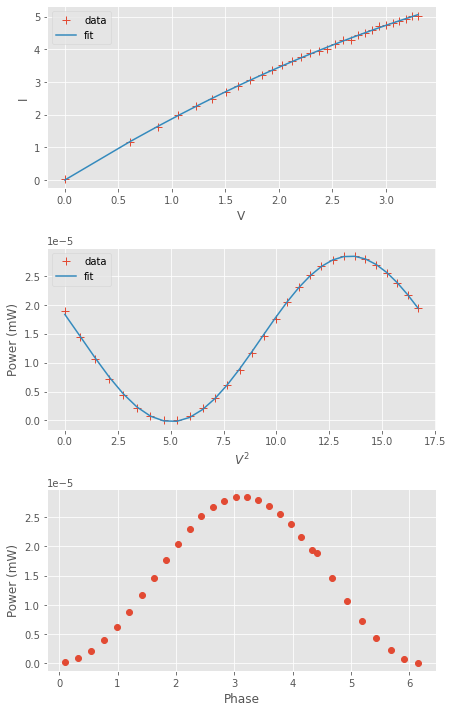

In [7]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"BS1":0, #0.3
    "BS2":pi, #-0.23
    "BS3":0, #0.75
    "WDM1":0,
    "WDM2":0,
    "WDM3":0,
    "WDM4":0,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":0, #trust
    "Prj_RY1":pi,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":0,
    "Ctr_2":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Bell1", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Bell2 -> input 23 output 8 (Happy) - Ben 30072020

0.18629854911707303 -0.7891592863126726 0.036734339307945015 0.0009295943221981126
fit visibility = 39.516527189068064
data visibility = 0.9304977775670215


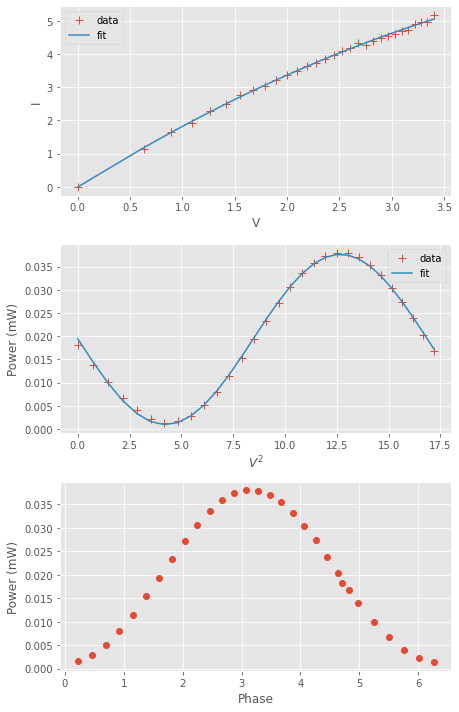

In [16]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,0.0,1e-3,1e-3]
phase_offset = 0
phases_to_set={}
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':pi/2, 'Pre_RY1':0, 'Prj_RY2':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMf, "Bell2", phases_to_set, v_max=3.4, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.18860356531775188 -0.8952070742044171 0.0007117311073436403 0.00017102350581580818
fit visibility = 4.1615981613087305
data visibility = 0.6669219624566057


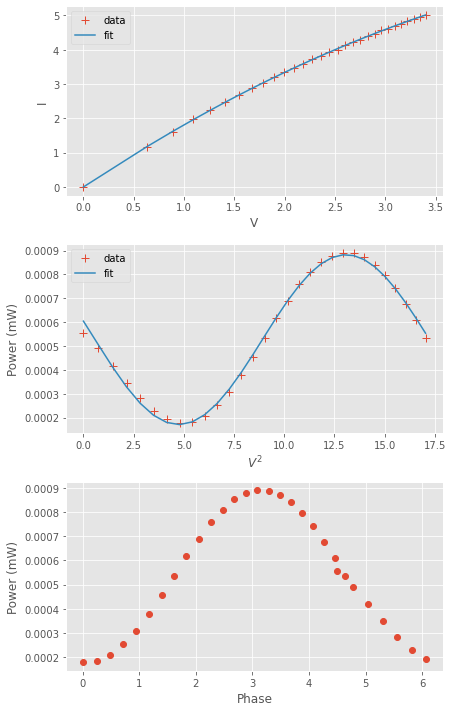

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,0.0,1e-3,1e-3]
phase_offset = 0
phases_to_set={}
phases_to_set={'BS1':0, 'BS2':0, 'WDM1':pi/2, 'Pre_RY1':0, 'Prj_RY2':0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Bell2", phases_to_set, v_max=3.4, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Pre_RY1 -> input 23 output 8 (Happy) - Ben 30072020

0.18020334828439077 -0.7356461855008223 0.018451739340360065 4.721389164077393e-05
fit visibility = 390.8116594317156
data visibility = 0.9932865632386685


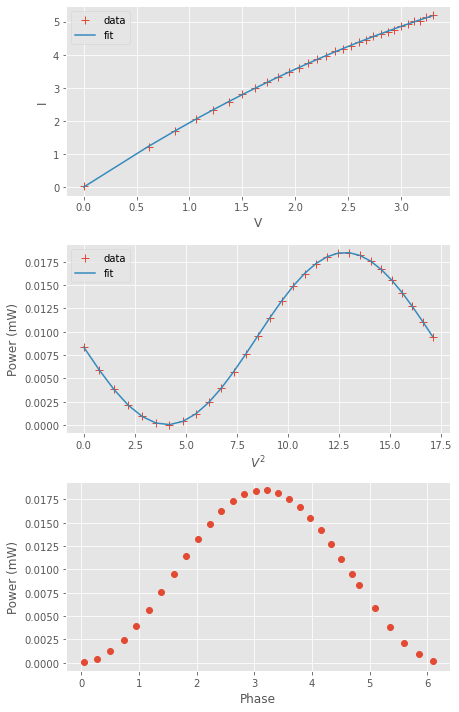

In [14]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,0.0,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Pre_RY1", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.181683242870578 -0.2451006003654632 0.0001045550740074261 6.552725074998307e-07
fit visibility = 159.5596836594783
data visibility = 0.9921572214424189


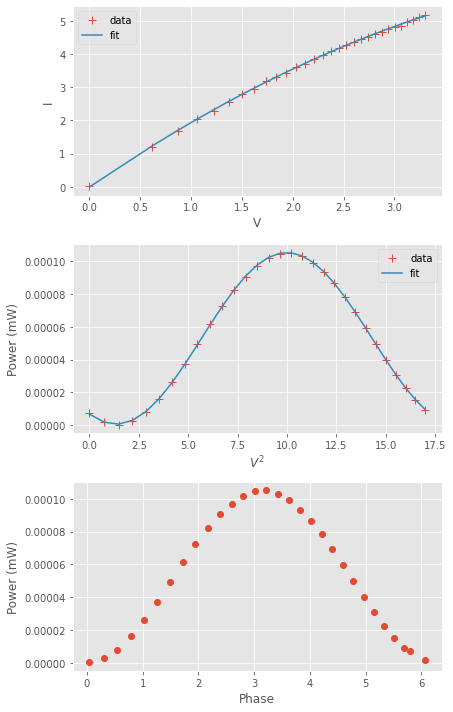

In [9]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,0.0,1e-3,1e-3]
phase_offset = 0
phases_to_set={"BS1":0, #0.3
    "BS2":pi, #-0.23
    "BS3":0, #0.75
    "WDM1":0,
    "WDM2":0,
    "WDM3":0,
    "WDM4":0,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":0, #trust
    "Prj_RY1":pi,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":0,
    "Ctr_2":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Pre_RY1", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Prj_RZ1 -> input 23 output 7 (Happy) - Ben 30072020 

0.18686852373060522 4.089852075737809 0.007267610804731805 0.022575276511607848
fit visibility = 0.32192787543465595
data visibility = 0.1375453862793996


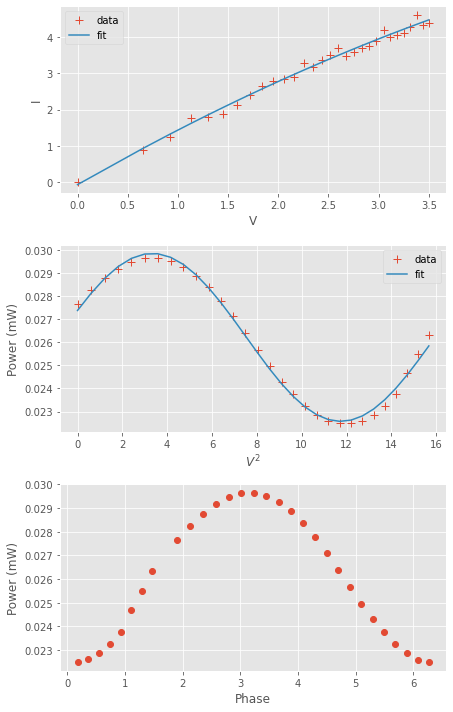

In [9]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':pi/2, 'WDM1':pi/2, 'WDM2':pi/2, 'Prj_RY1':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Prj_RZ1", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Pre_RZ1 -> input 23 output 9 Happy - Ben 30072020

0.21916956279418565 -1.5861096146718399 0.01701292182201414 0.02663889995106934
fit visibility = 0.6386495633552319
data visibility = 0.27455524055338065


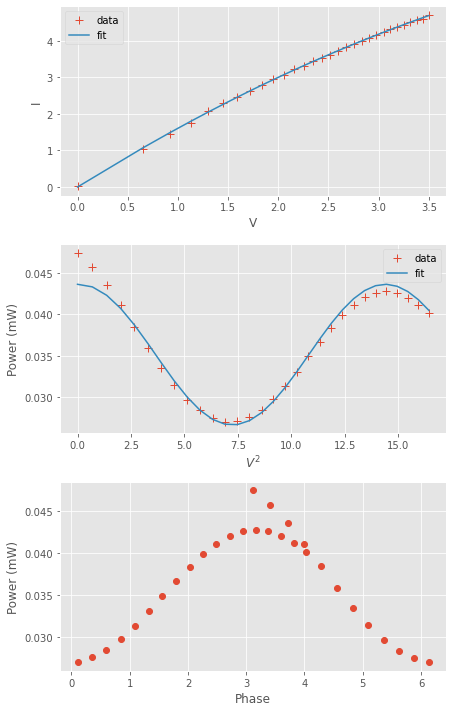

In [10]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':pi/2, 'WDM2':pi/2, 'Pre_RY1':pi/2, 'Bell1':pi, 'Bell2':pi, 'Prj_RY2':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Pre_RZ1", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Prj_RZ2 -> input 23 output 8 Happy - Ben 30072020

0.22848094374042438 2.0401925209392546 0.0065958178649503894 0.03919574818903791
fit visibility = 0.16827891211922516
data visibility = 0.07751744801999952


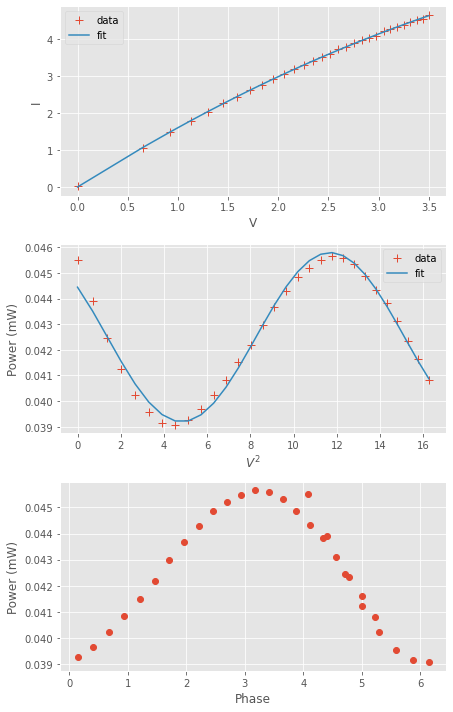

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0 
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':pi/2, 'Pre_RY1':pi/2, 'Bell1':pi, 'Bell2':pi, 'Prj_RY2':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Prj_RZ2", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### WDM3 -> input 23 output 8 (Happy) - Ben 30072020

0.1892711892650794 3.8292579130701916 0.08564315787581922 0.00046755877326557725
fit visibility = 183.17089267229557
data visibility = 0.996410242153007


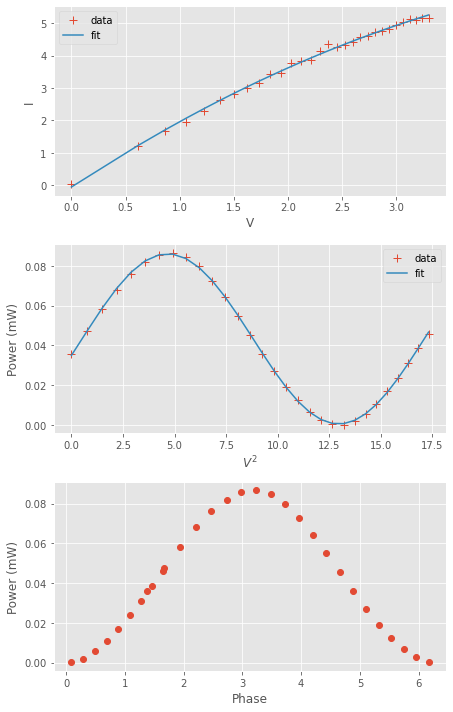

In [21]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(i_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS3':pi, "Prj_RY4":0, "Ctr_2":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "WDM3", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### WDM4 -> input 19 output 8 (Happy) - Ben 30072020

0.18927573736214764 1.897829774319162 0.00024689985765320054 1.552259525428751e-06
fit visibility = 159.05836208993733
data visibility = 0.9970322044460552


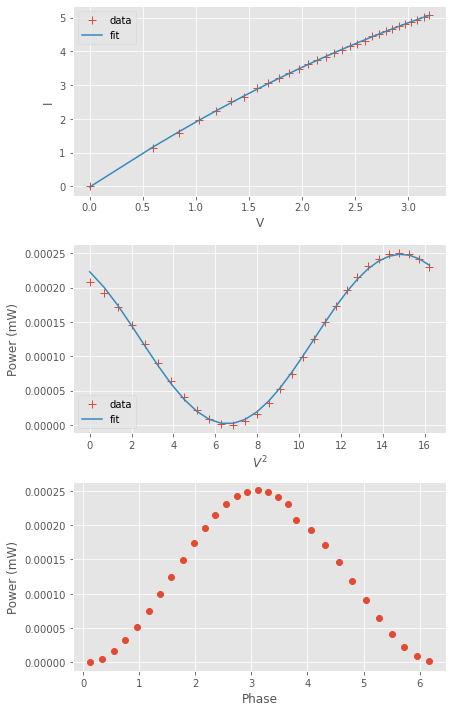

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(i_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS3':0, "Prj_RY4":pi, "Ctr_2":0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "WDM4", phases_to_set, v_max=3.2, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Pre_RY2 -> input 23 output 8 Happy - Ben 30072020

In [77]:
h.set_all_zeros_bad()

0.18316546749249946 4.088498378216239 0.022081608323031063 0.008374528226579542
fit visibility = 2.6367584806684667
data visibility = 0.5704115140834968


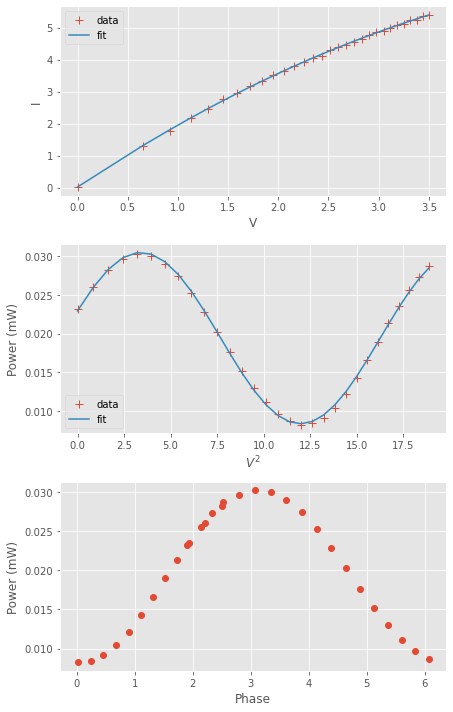

In [18]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phase_to_set = {}
phases_to_set={'BS1':0, 'BS3':0, 'WDM4':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "Pre_RY2", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.17519618015507898 2.7220014169052207 1.4551473573156663e-06 -8.688853854679294e-08
fit visibility = -16.747287751099776
data visibility = 1.0


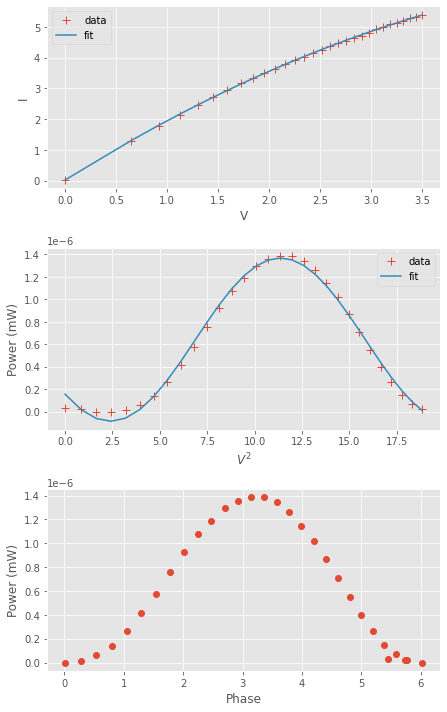

In [8]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phase_to_set = {}
phases_to_set={"BS1":pi, #0.3
    "BS2":pi, #-0.23
    "BS3":pi, #0.75
    "WDM1":0,
    "WDM2":0,
    "WDM3":0,
    "WDM4":0,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":0,
    "Prj_RY1":pi,
    "Prj_RY2":pi,
    "Prj_RY3":0,
    "Prj_RY4":pi,
    "Ctr_1":0,
    "Ctr_2":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "Pre_RY2", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Prj_RY3 -> input 23 output 10 (Happy) - Ben 30072020

0.18044625013079874 4.122105209177258 0.033008966018427406 0.006232181069759563
fit visibility = 5.296535137368993
data visibility = 0.722424396086141


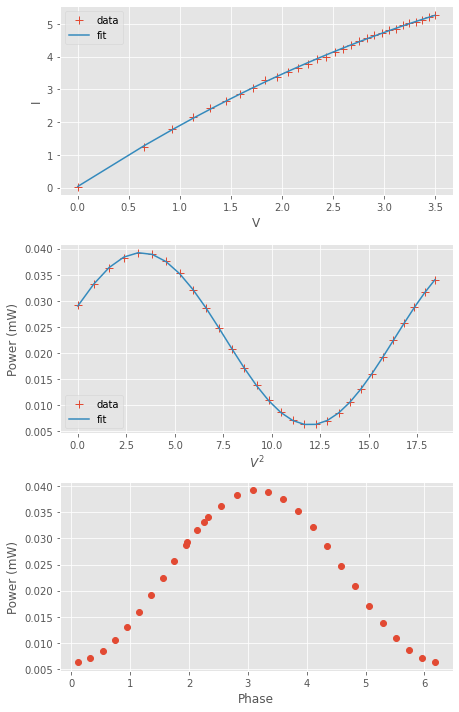

In [19]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={}
phases_to_set={'BS1':0, 'BS3':0, 'WDM4':pi/2,'Pre_RY2':pi, "Bell2": pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "Prj_RY3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

voltage for Pre_RY1 was too high, so was not set
tried to set 13.285024987835442 but max is 3.7
0.18147790734933084 3.8861709740374093 0.0008211924310695979 3.6223245071969746e-05
fit visibility = 22.67031651741916
data visibility = 0.9265746031502298


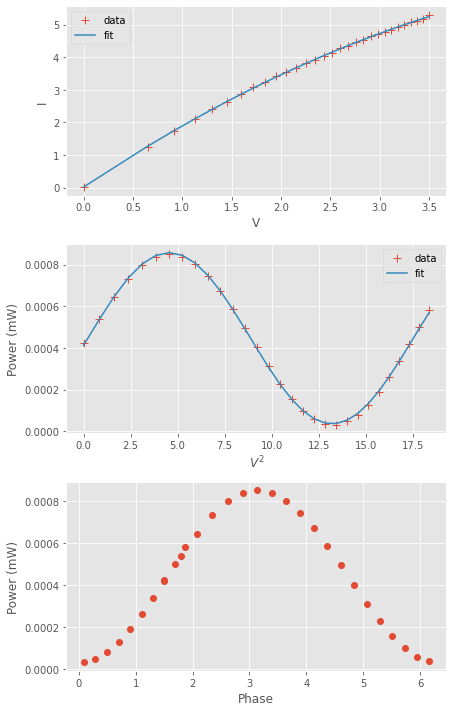

In [13]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={}
phases_to_set={'BS1':0, 'BS2':0, 'WDM1':pi/2,'Pre_RY1':0, "Bell2": 0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "Prj_RY3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### BS3 -> input 23 output 17 happy - Ben 30072020

0.16340728399925258 3.0648595218235193 0.00017301010432388433 3.6603155521842614e-06
fit visibility = 47.26644516225986
data visibility = 0.9510916974595022


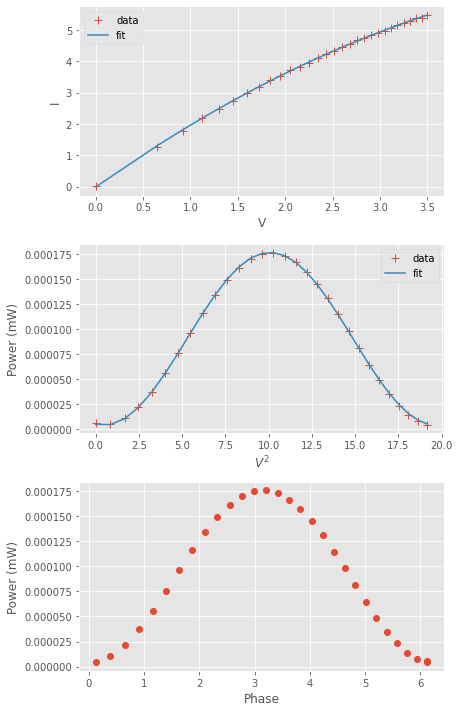

In [31]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset =0
phases_to_set={'BS1':0, 'Prj_RY4':0, "Ctr_2":0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "BS3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.16690587794204834 1.46129858346239 4.143091635859154e-05 -1.0340034619459986e-07
fit visibility = -400.68450332476056
data visibility = 0.9983988607438292


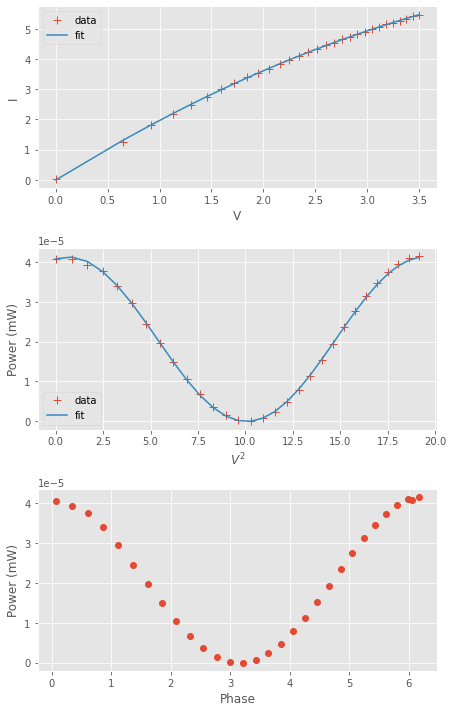

In [29]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={'BS1':pi, 'Prj_RY4':pi, "Ctr_2":pi, "Ctr_1":0, "WDM4":3*pi/2, "WDM3":pi/2, "MZIa2":pi, "MZIa4":pi, "Atta3":pi, "Atta4":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "BS3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Pre_RZ2 -> input 23 output 8 (Happy) - Ben 30072020

0.2012659633195383 2.3603060530454814 0.07041036337880009 0.0019012960875618757
fit visibility = 37.032823998018486
data visibility = 0.9459663456182864


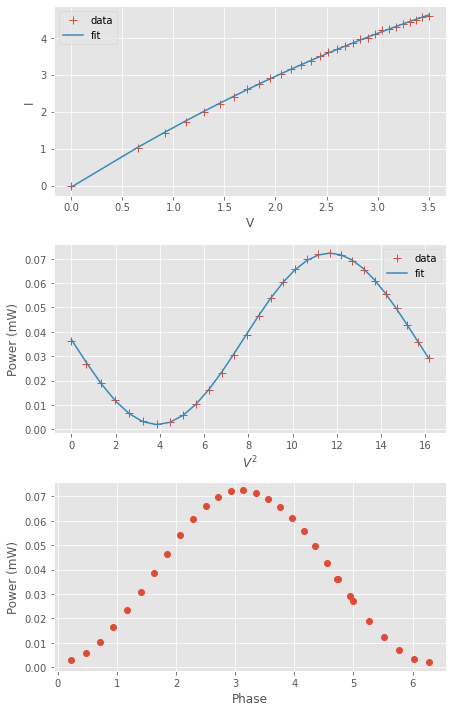

In [13]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS3':0, 'Bell1':pi, 'WDM4':pi/2, 'Bell2':pi, 'Pre_RY2':pi/2, 'Prj_RY3':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "Pre_RZ2", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Prj_RZ3 -> input 23 output 10 (Happy) - Ben 30072020

0.203377820048157 3.9467064373610596 0.06063813632220343 0.0074784107045243586
fit visibility = 8.10842553559114
data visibility = 0.8077673347059413


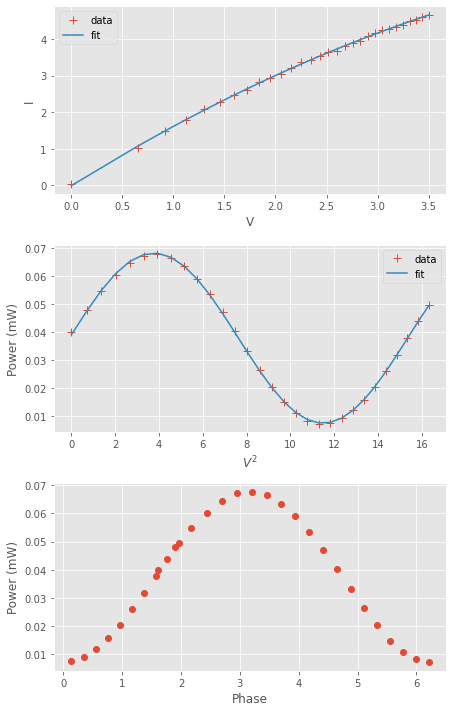

In [10]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0 
phases_to_set={'BS1':0, 'BS3':0, 'Bell1':pi, 'WDM4':pi/2, 'Bell2':pi, 'Pre_RY2':pi/2, 'Prj_RY3':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMg, "Prj_RZ3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Ctr_1 -> input 12 output 13 (Happy) - Ben 30072020

0.18033337123778 2.3600891278283247 -0.0018303303541492423 0.0018392001070058346
fit visibility = -0.9951773856347628
data visibility = 0.9964047617472777


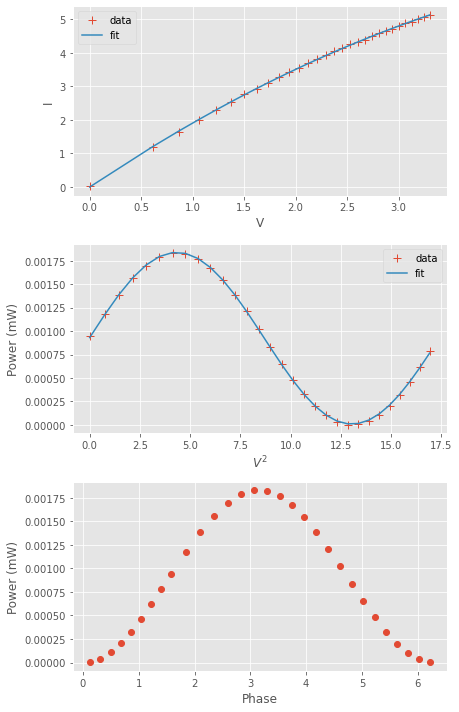

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(i_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.15,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={'BS1':0, 'BS3':0, 'WDM4':pi/2, 'Prj_RY4':0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "Ctr_1", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Ctr_2 -> input 23 output 17 (It Will Do) - Ben 30072020

0.1719521768608395 1.9128270681847153 0.008497054024723418 -1.6704056578463348e-05
fit visibility = -508.6820668267328
data visibility = 0.999981696564818


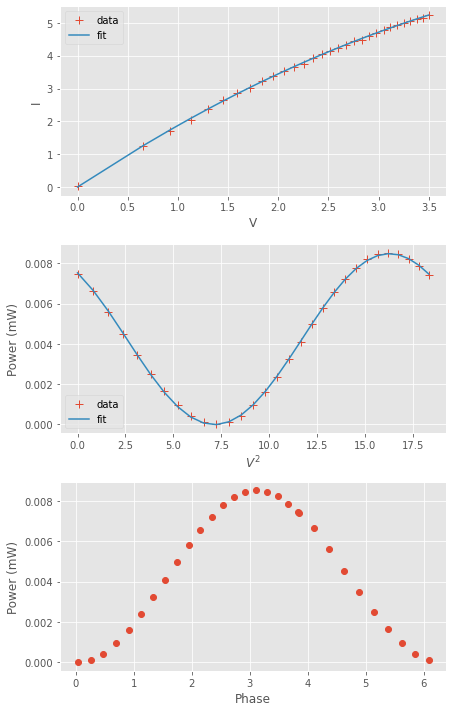

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(i_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS3':0, 'WDM4':pi/2, 'Prj_RY4':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "Ctr_2", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Prj_RY4 -> input 19 output 17 (Happy) - Ben 30072020

0.16872647610869648 2.8003408202326914 7.519369666020101e-05 -4.1186947504587673e-07
fit visibility = -182.56681112827175
data visibility = 0.9897742364992078


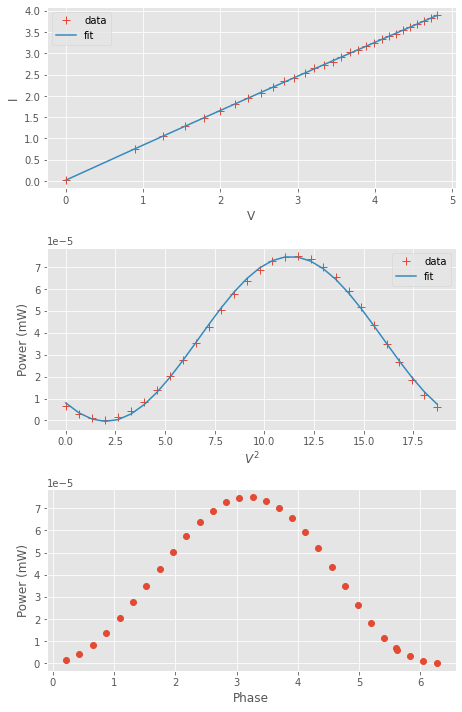

In [35]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(i_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"BS1":0, "BS3": 0, 'WDM4':pi/2, "Ctr_2":0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "Prj_RY4", phases_to_set, v_max=4.8, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

0.1836644253771996 2.6163933761357994 6.4095349713471185e-06 -4.618553657298152e-08
fit visibility = -138.7779691856322
data visibility = 0.9957218966856719


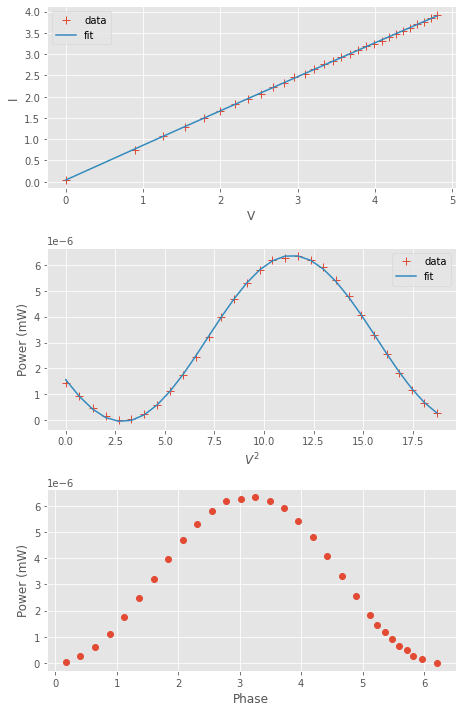

In [8]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"BS1":pi, "BS3": 0, 'WDM4':pi, "Ctr_2":pi, "MZIa2":pi, "MZIa4":pi, "Atta4":pi, 'Atta3':0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "Prj_RY4", phases_to_set, v_max=4.8, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Prj_RZ4 -> input 23 output 17 (Happy) - Ben 30072020

0.1949488206332597 2.439596961464765 0.06404560486091829 0.0013229762883285468
fit visibility = 48.41024395216769
data visibility = 0.9467410071107665


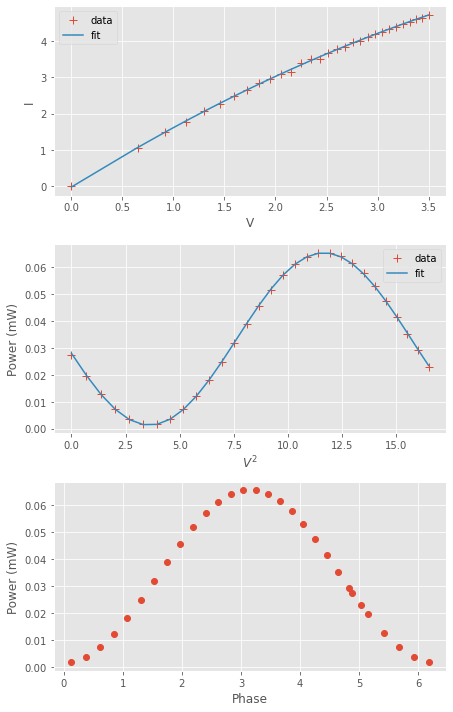

In [15]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS3':pi/2, 'Ctr_1':pi, 'Prj_RY4':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "Prj_RZ4", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### MRR3 -> input 23 output 17 

In [ ]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={ "BS1":0, "BS3":pi, "WDM3":3*pi/2, "Prj_RY4":pi, "Ctr_1":0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMc, "MRR3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 200)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

## Calibration Charlie

In [ ]:
mytunics.laser_switch('off')
h.set_all_zeros_bad()

In [ ]:
h.set_many_phases({'MZIb2':pi, 'MZIb3':pi})
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')

In [ ]:
print(PMa.measure())
print(PMb.measure())
print(PMc.measure())
print(PMd.measure())

### MZIb1 -> input 1 output 1 (Happy) - Ben 06082020

0.1503296243987935 2.556548089170813 0.0022919665674136086 1.1942442643859997e-05
fit visibility = 191.91773707969065
data visibility = 0.99759810124989


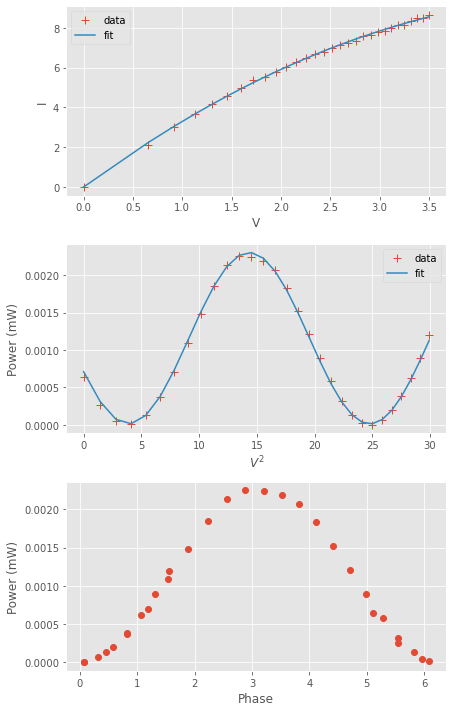

In [16]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,1,1e-3,1e-3]
phase_offset = 0
phases_to_set={"Attb1": pi, "MZIb3":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "MZIb1", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### MZIb3 -> input 1 output 1 (Happy) - Ben 06082020

0.14858451008668763 2.811380153737231 0.002277355768817293 1.1064367063570065e-05
fit visibility = 205.8279299423815
data visibility = 0.9935405288798367


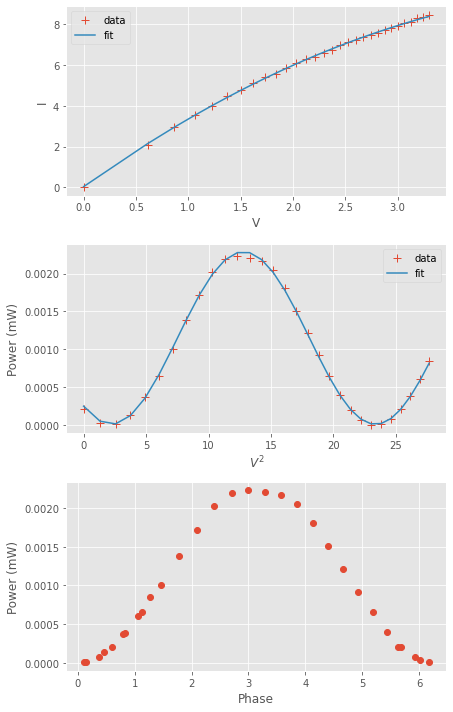

In [15]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"MZIb1":pi, "Attb1": pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "MZIb3", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### MZIb4 -> input 4 output 4 (Happy) 06082020

0.14786431209948264 3.6967805563486444 0.006523263281629254 1.739596514525191e-05
fit visibility = 374.98714369462436
data visibility = 0.99518366330904


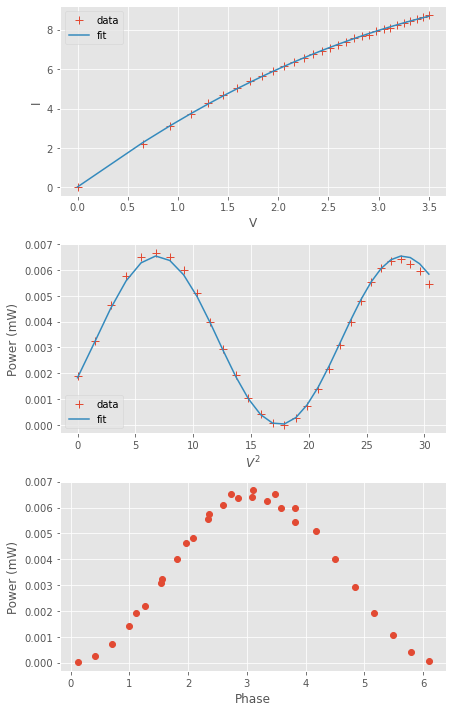

In [17]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"Attb1": pi, "MZIb1": 0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMc, "MZIb4", phases_to_set, phase_offset, v_max=3.5, sleep=sleep, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### MZIb2 -> input 4 output 4 (Happy) - Ben 06082020

0.1341824248891058 3.6238743672976876 1.2244382957161066e-06 4.508877211468799e-07
fit visibility = 2.715616856013777
data visibility = 0.7656909486309785


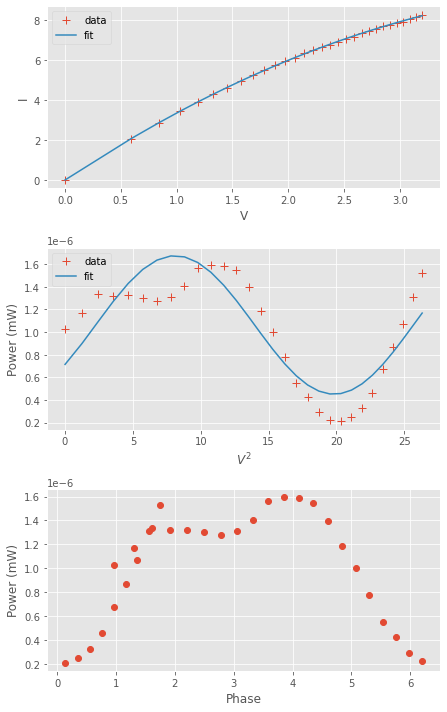

In [18]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"Attb3": 0, "Attb1": 0, "Attb2": 0, "Attb4": pi,"MZIb4": pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "MZIb2", phases_to_set, v_max=3.2, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Attb1 -> input 1 output 1 (Happy) - Ben 06082020

0.15199718836175571 4.7573878846256 5.774603262923516e-07 -2.43954572362678e-09
fit visibility = -236.70813819954284
data visibility = 0.9918244257346108


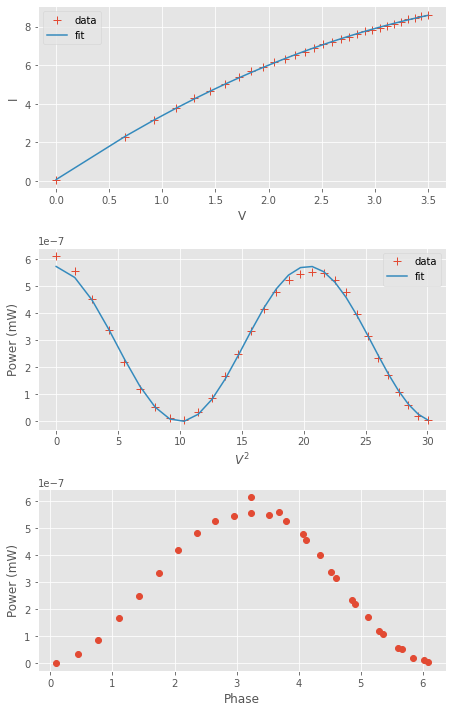

In [9]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset =0
phases_to_set={}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Attb1", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Attb4 -> input 4 output 4 (Happy) - Ben 06082020

0.15074969378398767 4.28022872512539 1.1687623128798945e-07 1.0192153067450126e-08
fit visibility = 11.467275904759305
data visibility = 0.9200153449068789


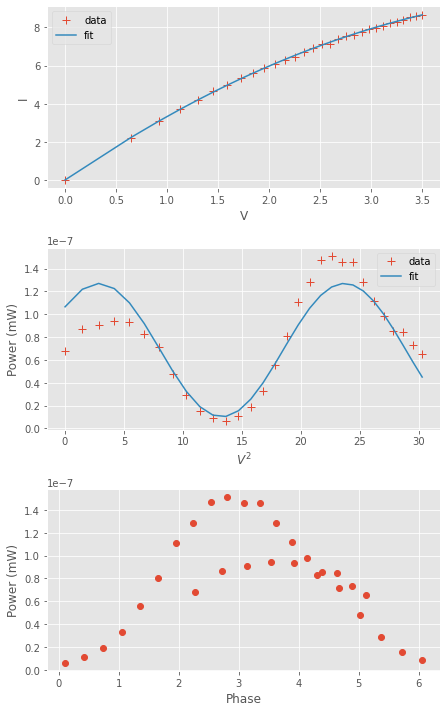

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset =0
phases_to_set={}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "Attb4", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Attb2 -> input 2 output 1 (Happy) - Ben 06082020

0.15013103041217926 2.240050848730388 -0.0003059270409693397 0.00030511234235889223
fit visibility = -1.0026701594702752
data visibility = 0.9960305493431008


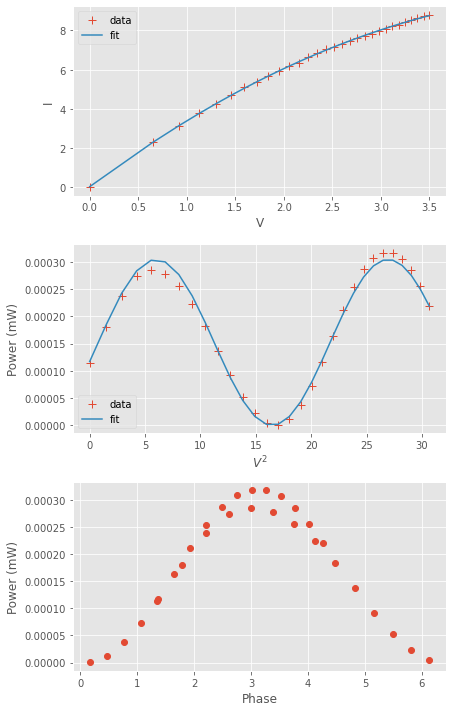

In [13]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Attb2", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Attb3 -> input 3 output 1 (Happy) - Ben 06082020

0.14941488736303712 1.8328299511539143 0.004686291576561576 -2.9529638013786193e-05
fit visibility = -158.69790121957254
data visibility = 0.9943138225989643


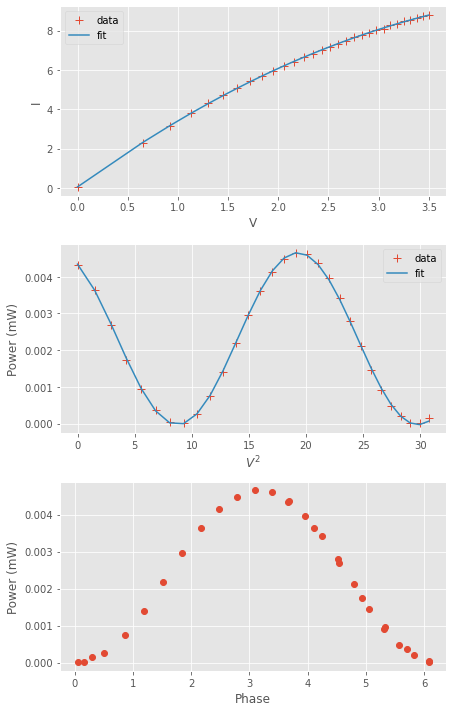

In [12]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"MZIb4": pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMd, "Attb3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Phb1 -> input A23 C1+2 output 1 (Alice output 6+7)

0.18418514220191004 0.5424036943430267 0.0023833477185576124 0.00012255719627917707
fit visibility = 19.446819859753532
data visibility = 0.9276231824035791


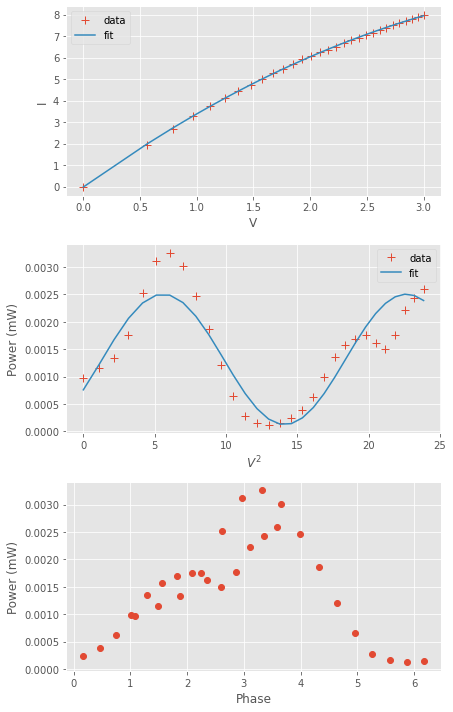

In [15]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,1,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS2':0, 'WDM1':0, 'Prj_RY1':pi/2, 'Attb1':pi, 'Attb2':pi, 'MZIb1':pi/2, 'MZIb3':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Phb1", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Phb2 -> input A23 C1+2 output 1 (Alice output 6+7) NOT happy

0.1773267128949659 0.42960023932101227 0.0017601200485861833 -0.0002480553911983181
fit visibility = -7.095673430370972
data visibility = 0.9623297576054987


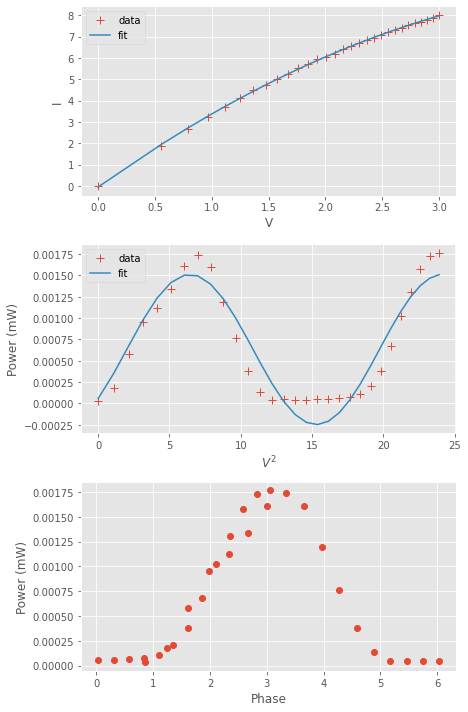

In [14]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,0.8,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS2':0, 'WDM1':0, 'Prj_RY1':pi/2, 'Attb1':pi, 'Attb2':pi, 'MZIb1':pi/2, 'MZIb3':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Phb2", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Phb3 -> input A23 C3+4 output 1 (Alice output 6+7)

0.22237630434438427 2.904673254677905 -0.009342307768235239 0.010781975037668536
fit visibility = -0.8664746241385654
data visibility = 0.9023170652838693


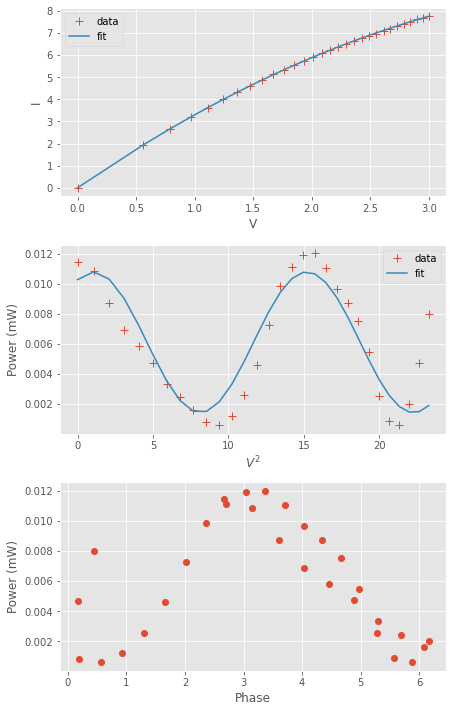

In [24]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={'BS1':pi, 'BS3':pi, 'WDM4':pi/2, 'Prj_RY4':pi/2, 'Ctr_1':pi, 'Ctr_2':pi, 'Attb3':pi, 'Attb4':pi, 'MZIb2':pi/2, 'MZIb3':0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Phb3", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Phb4 -> input A23 C3+4 output 1 (Alice output 6+7)

0.10875638335607554 3.133967528149585 0.00454029960199491 -0.00014786013263340836
fit visibility = -30.70671939170876
data visibility = 0.9957734031259183


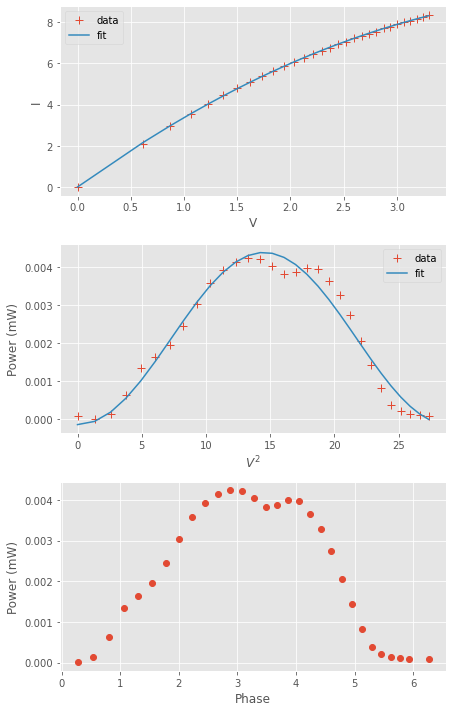

In [29]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.15,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':pi, 'WDM1':pi, 'Prj_RY1':pi/2, 'Attb3':pi, 'Attb4':pi, 'MZIb2':pi/2, 'MZIb3':0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMa, "Phb4", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Phb5 -> input A23 C1+3 output 1 (Alice output 6+7)

In [ ]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset =pi
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':pi, 'Prj_RY1':pi/2, 'Attb1':pi, 'Attb3':pi, 'MZIb2':pi, 'MZIb3':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Phb5", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Phb6 -> input A23 C2+4 output 1 (Alice output 6+7)

In [ ]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset =pi
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':pi, 'Prj_RY1':pi/2, 'Attb2':pi, 'Attb4':pi, 'MZIb2':pi, 'MZIb4':pi/2}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "Phb6", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')



## Calibration Bob

In [ ]:
mytunics.laser_switch('off')
h.set_all_zeros_bad()

In [10]:
h.set_many_phases({'MZIb2':pi, 'MZIb3':pi})
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')

In [ ]:
print(PMa.measure())
print(PMb.measure())
print(PMc.measure())
print(PMd.measure())

### Atta1 -> input 1 output 1

0.15041612907214227 3.50190452272897 -0.004385289240413261 0.004389244265111427
fit visibility = -0.9990989280934753
data visibility = 0.9971504925970965


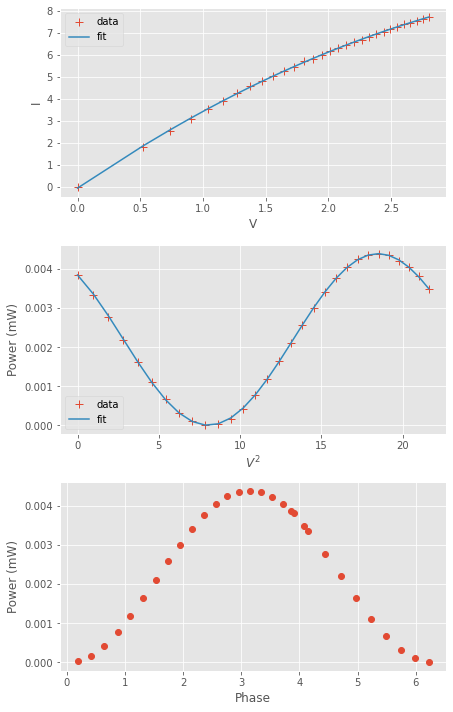

In [8]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.2,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Atta1", phases_to_set, v_max=2.8, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Atta2 -> input 2 output 1

0.14754383970597496 2.60744125489647 -0.0008539131822832724 0.0008532946771228888
fit visibility = -1.000724843570417
data visibility = 0.9963863700308695


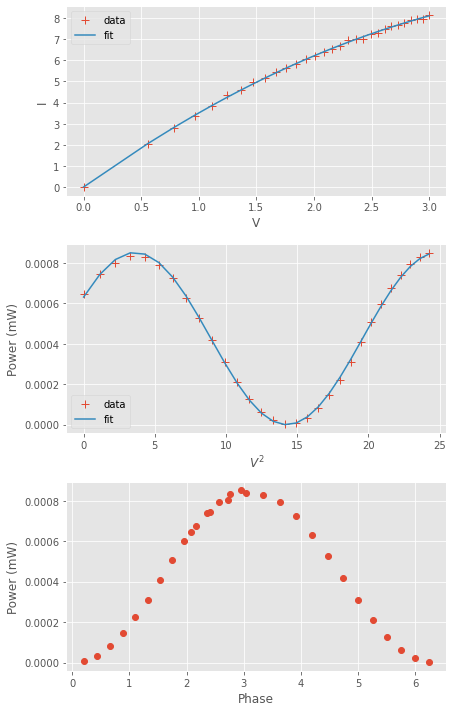

In [15]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Atta2", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Atta3 -> input 3 output 3

0.14721227211152044 2.6457640932166497 -4.5738002441293066e-05 4.5137014949760876e-05
fit visibility = -1.0133147371885605
data visibility = 0.9954225414058917


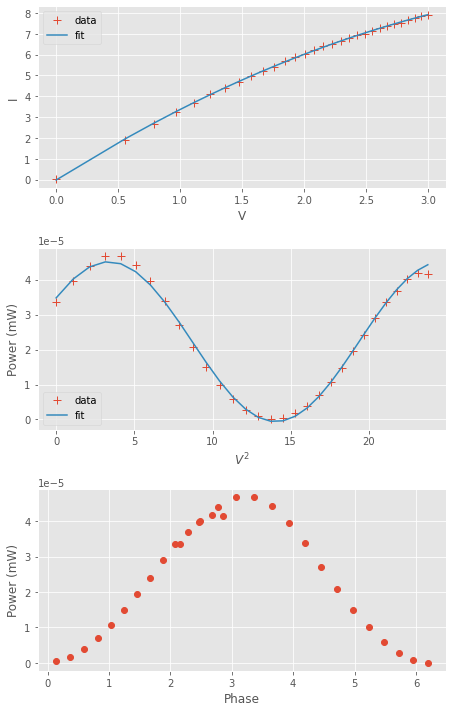

In [17]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = pi
phases_to_set={}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Atta3", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Atta4 -> input 4 output 4

0.14648319760282408 4.017447198084053 2.1665059866034212e-05 3.375528815760311e-08
fit visibility = 641.827134310934
data visibility = 0.9981805069522086


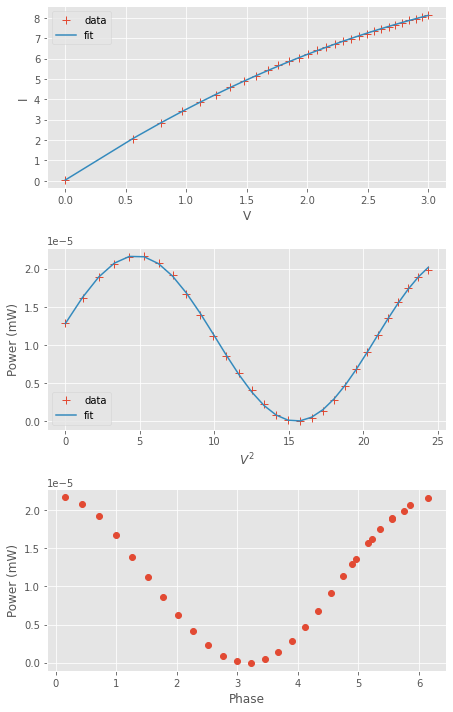

In [13]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = pi
#phases_to_set = {} #calibrating from scratch with no previous calibrtion
phases_to_set={"MZIa2": pi, "MZIa4": pi} ##if calibration has already been done

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "Atta4", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### MZIa1 -> input 1 output 1

0.12398979644062798 2.3057936905328194 0.024323515158428004 -9.638176019502346e-05
fit visibility = -252.36637211450216
data visibility = 0.9962253329145808


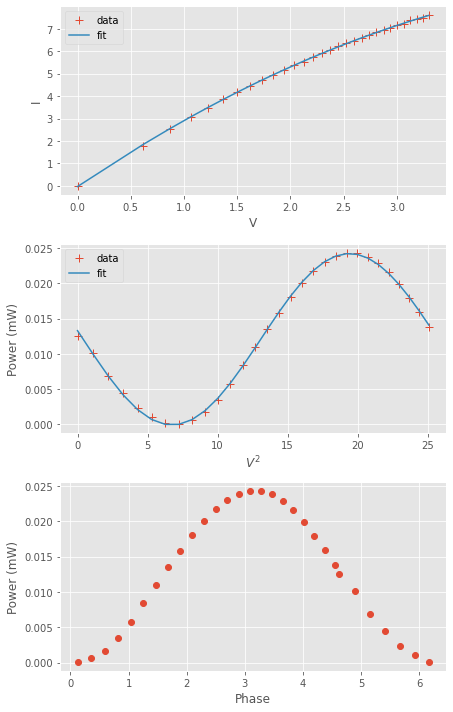

In [9]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"Atta1":pi, "Atta2":0, "Atta3":0, "Atta4":0, "MZIa3":pi, 'BS1':0, 'BS2':0, 'WDM1':pi/2, 'Prj_RY1':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "MZIa1", phases_to_set, v_max=3.3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### MZIa2 -> input 4 output 4

0.14806943668306807 3.0428556448838626 3.72264097088482e-05 2.6221601534854355e-07
fit visibility = 141.96848220489508
data visibility = 0.9993469893300668


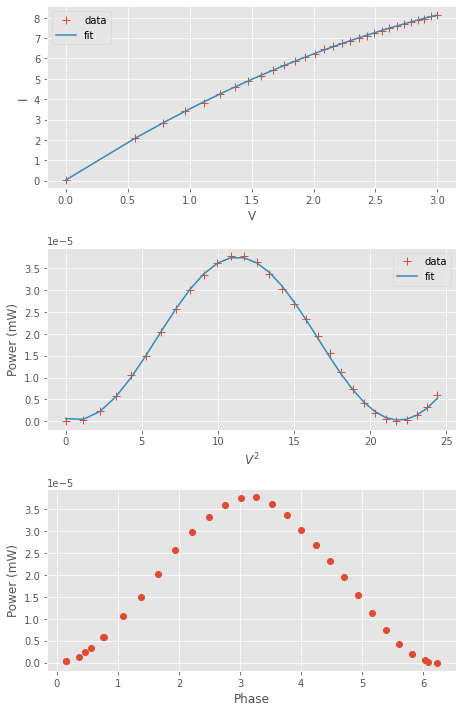

In [11]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,3,1e-3,1e-3]
phase_offset =0
phases_to_set={"Atta1":0, "Atta2":0, "Atta3":0, "Atta4":pi, "MZIa4":pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "MZIa2", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### MZIa3 -> input 1 output 1

0.12434047195095617 3.6572012371597555 0.029152788973345816 0.00040754059416814195
fit visibility = 71.5334604466863
data visibility = 0.9949538750760089


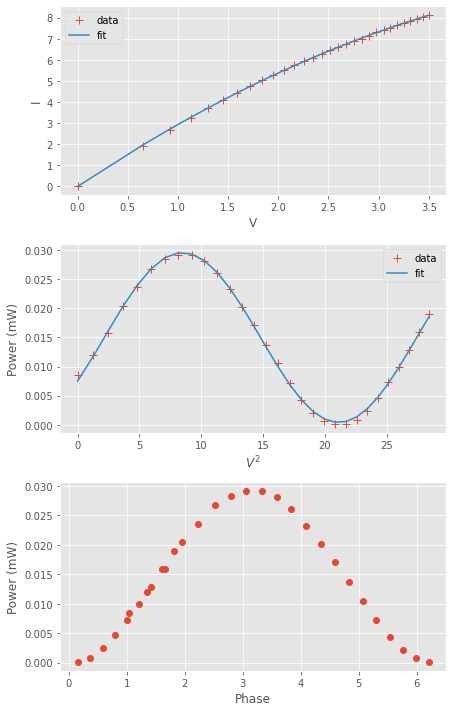

In [10]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset = 0
phases_to_set={"Atta1":pi, "Atta2":0, "Atta3":0, "Atta4":0, 'MZIa1':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "MZIa3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### MZIa4 -> input 4 output 4

0.1424082171444822 3.452655102354111 3.679110433018441e-05 2.0476240358017548e-07
fit visibility = 179.6770485543686
data visibility = 0.9964574479318075


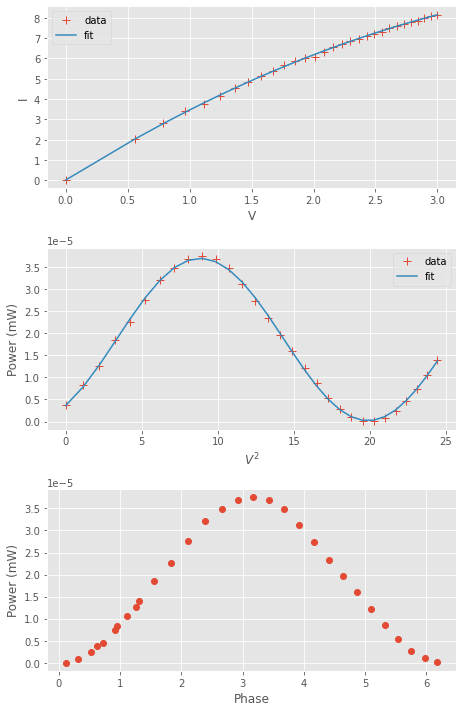

In [12]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,3,1e-3,1e-3]
phase_offset =0
phases_to_set={"Atta1":0, "Atta2":0, "Atta3":0, "Atta4":pi, 'MZIa2':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "MZIa4", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Pha1 -> input 1 output 1

0.1679844133279296 1.3393559604438465 1.5817825244037122e-05 -3.164000415326473e-07
fit visibility = -49.993119999021815
data visibility = 0.9227852961567028


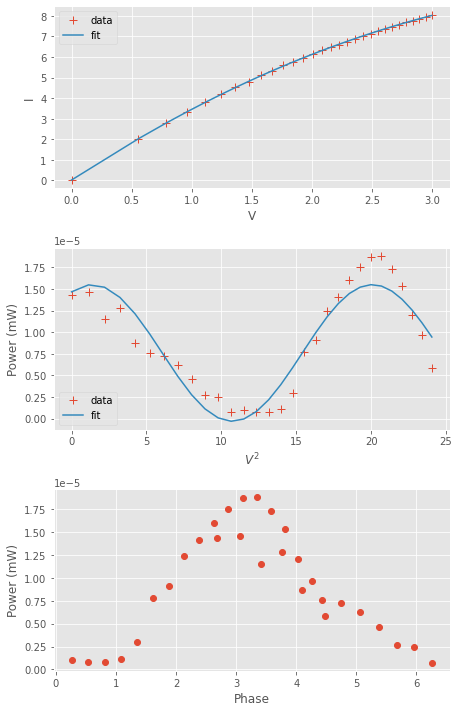

In [14]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_power(3)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,0.8,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS2':0, 'WDM1':pi/2, 'Prj_RY1':pi/2, 'Atta1':pi, 'Atta2':pi, 'Atta3':0, 'Atta4':0, 'MZIa1':pi/2, 'MZIa3':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Pha1", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Pha2 -> input 2 output 2

0.18749102716648025 1.8710587145799038 2.358192954511787e-05 7.795164579972081e-07
fit visibility = 30.251996995299272
data visibility = 0.9300353603650772


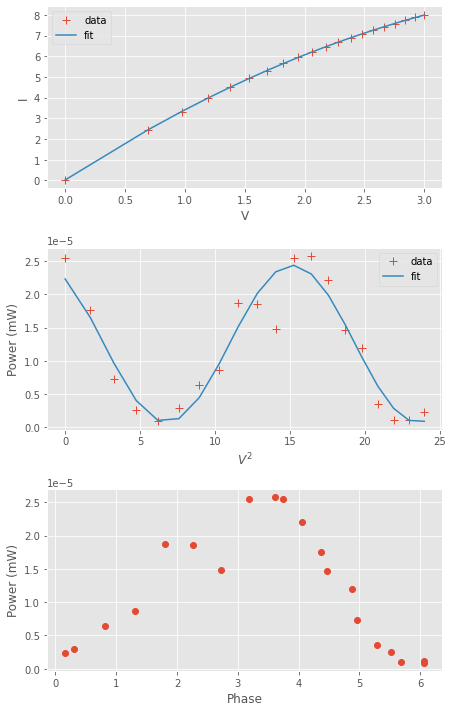

In [16]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_power(4)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,0.8,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':0, 'BS2':0, 'WDM1':pi/2, 'Prj_RY1':pi/2, 'Atta1':pi, 'Atta2':pi, 'Atta3':0, 'Atta4':0, 'MZIa1':pi/2, 'MZIa4':pi}
#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMg, "Pha2", phases_to_set, v_max=3, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 20)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Pha3 -> input 3 output 3

0.2615795055066878 -0.47675997810971377 8.563256693973945e-07 7.270235999172291e-07
fit visibility = 1.1778512685074958
data visibility = 0.44166172940604653


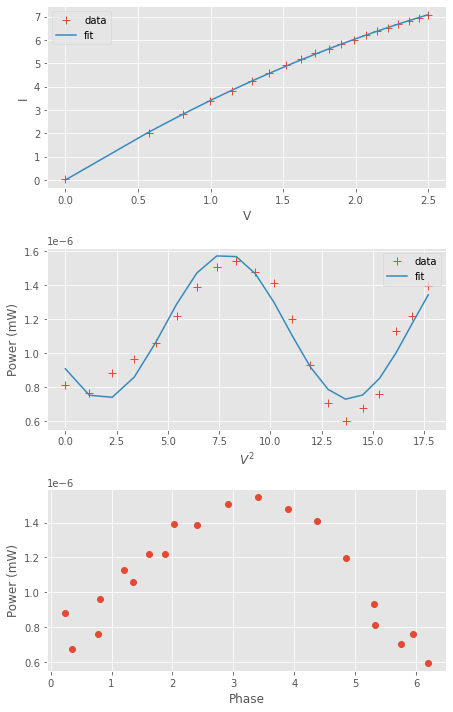

In [18]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_power(3)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,0.8,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':0, 'WDM4':pi/2, 'Prj_RY4':pi/2,'Ctr_1':pi, 'Ctr_2':pi, 'Atta1':0, 'Atta2':0,  'Atta3':pi, 'Atta4':pi, 'MZIa2':pi/2, 'MZIa3':0}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMe, "Pha3", phases_to_set, v_max=2.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 20)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

### Pha4 -> input 4 output 4

0.1768599034116303 1.5850478323807498 5.661824459533782e-07 5.550448179288957e-07
fit visibility = 1.0200661778377493
data visibility = 0.40843180689474234


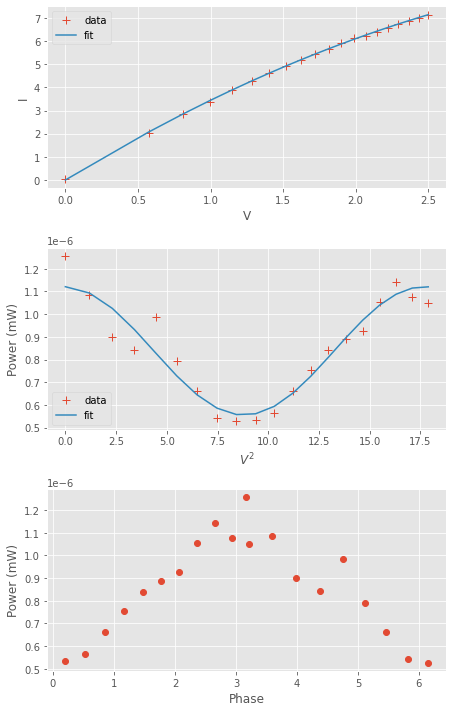

In [19]:
# want zero phase to correspond to signal going straight through filter, not to herald. So zero phase at min here
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.20,0.8,1e-3,1e-3]
phase_offset = 0
phases_to_set={'BS1':pi, 'BS2':0, 'WDM4':pi/2, 'Prj_RY4':pi/2,'Ctr_1':pi, 'Ctr_2':pi, 'Atta1':0, 'Atta2':0,  'Atta3':pi, 'Atta4':pi, 'MZIa2':pi/2, 'MZIa4':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMh, "Pha4", phases_to_set, v_max=2.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 20)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')